In [1]:
import numpy as np
import pandas as pd
from TrainTestSplit import trainTestSplit
from sklearn.naive_bayes import GaussianNB

'------------------------------------------------- Initial Setup -------------------------------------------------'

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

np.set_printoptions(precision = 2)

In [2]:
## Loading in the data of Set B.
XTrain, XTest, YTrain, YTest = trainTestSplit("B")

In [3]:
## Setting the classifier to be Gaussian Naive Bayes .
Classifier = GaussianNB()

## Defining a list to store the Cross-Validation Scores .
crossValidationScores = []

## Computing the 10-fold cross-validation score.
cvScore = cross_val_score(Classifier, XTrain, YTrain['FTR'], cv = 10)
crossValidationScores.append(np.mean(cvScore))
print "Cross Validation Score : ", np.mean(crossValidationScores)

## Computing the Training and Testing Accuracies .
Classifier.fit(XTrain,YTrain)
print "Training Accuracy : ", Classifier.score(XTrain, YTrain)
print "Testing Accuracy : ", Classifier.score(XTest, YTest)

Cross Validation Score :  0.510946810272
Training Accuracy :  0.513244090003
Testing Accuracy :  0.5484375


In [4]:
## Removing the highly correlated variables.
highCorr = ['Streak']

XTrain.drop(highCorr, axis = 1 , inplace = True)
XTest.drop(highCorr, axis = 1 , inplace = True)

## Computing the 10-fold cross-validation score.
cvScore = cross_val_score(Classifier, XTrain, YTrain['FTR'], cv = 10)
crossValidationScores.append(np.mean(cvScore))
print "Cross Validation Score : ", np.mean(crossValidationScores)

## Computing the Training and Testing Accuracies .
Classifier.fit(XTrain,YTrain)
print "Training Accuracy : ", Classifier.score(XTrain, YTrain)
print "Testing Accuracy : ", Classifier.score(XTest, YTest)

Cross Validation Score :  0.512085602075
Training Accuracy :  0.515807462261
Testing Accuracy :  0.5515625


In [5]:
## Obtaining our predictions made by the best Gaussian Naive Bayes Classifier .
YPred = Classifier.predict(XTest)

## Defining the target classes .
classLabels = ['H','A','D']

## Obtaining the confusion matrix for our predictions .
confusionMatrix = confusion_matrix(YTest['FTR'], YPred, classLabels)
confusionMatrix

array([[205,  56,  47],
       [ 37, 115,  22],
       [ 74,  51,  33]])

In [6]:
## Obtaining a more readable format of our Confusion Matrix in terms of a Classification Report . 

classificationReport = classification_report(YTest, YPred, classLabels)
print classificationReport

             precision    recall  f1-score   support

          H       0.65      0.67      0.66       308
          A       0.52      0.66      0.58       174
          D       0.32      0.21      0.25       158

avg / total       0.53      0.55      0.54       640



In [8]:
## Visualising a comparison between the true and predicted class results.
## Defining the Final Result labels .
resultsLabels = ['Away','Draw','Home']

## Defining the True Labels .
trueValues = list(list(np.unique(YTest['FTR'] , return_counts = True))[1])

## Computing Predictions with our fine-tuned Naive Bayes Classifier .
YPred = Classifier.predict(XTest)
predValues = list(list(np.unique(YPred , return_counts = True))[1])

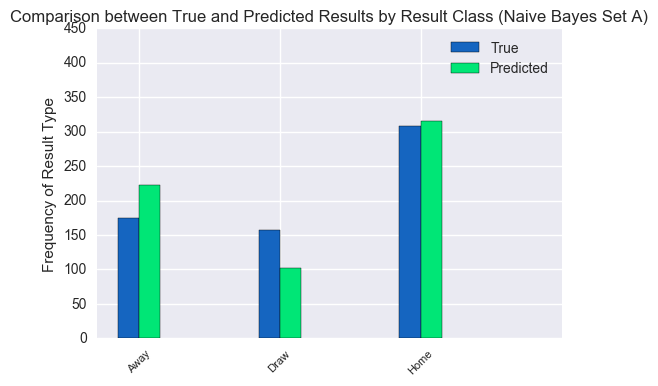

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
ind = np.arange(3)
width = 0.15      
rects1 = ax.bar(ind, trueValues, width, color = '#1565C0', error_kw = dict(elinewidth = 2, ecolor = 'blue'))

rects2 = ax.bar(ind + width, predValues, width, color = '#00E676', error_kw = dict(elinewidth = 2, ecolor = 'black'))

ax.set_xlim(-width,len(ind) + width)
ax.set_ylim(0, 450)
ax.set_ylabel('Frequency of Result Type')
ax.set_title('Comparison between True and Predicted Results by Result Class (Naive Bayes Set A)')
xTickMarks = resultsLabels
ax.set_xticks(ind + width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=45, fontsize=8)
ax.legend( (rects1[0], rects2[0]), ('True', 'Predicted') )
plt.show()